In [1]:

import numpy as np

from HW2.benchmark_proceeder import BenchmarkStorage
from HW2.optimization import MomentumOptimization, NesterovOptimization, AdaGradOptimization, RMSPropOptimization, \
    AdamOptimization

from HW2.regression_generator import generate_regression
from HW2.sgd import sgd, minibatch_gd, gd
from HW2.visualization import visualize_regression_point, draw_multiple_levels

[-28.72161237 -16.14811535]


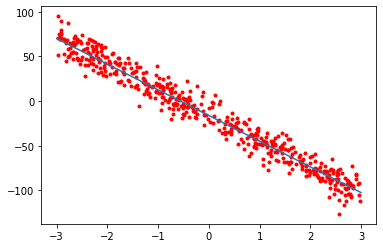

In [2]:
f, points, f_ab = generate_regression(f_scale=50, point_count=500, scale=np.array([3, 10]))

print(f_ab)

visualize_regression_point(f, points, scale=3)

storage = BenchmarkStorage()

In [3]:
start_point = np.array([0.0, 0.0])

_, meta_sgd = sgd(points, start_point=start_point.copy())
_, meta_momentum = sgd(points, optimization=MomentumOptimization(0.95), start_point=start_point.copy())
# noinspection SpellCheckingInspection
_, meta_nesterov = sgd(points, optimization=NesterovOptimization(0.95), start_point=start_point.copy())
_, meta_adagrad = sgd(points, optimization=AdaGradOptimization(), lr=0.9, start_point=start_point.copy())
_, meta_rmsprop = sgd(points, optimization=RMSPropOptimization(0.95), start_point=start_point.copy())
_, meta_adam = sgd(points, optimization=AdamOptimization(), start_point=start_point.copy())

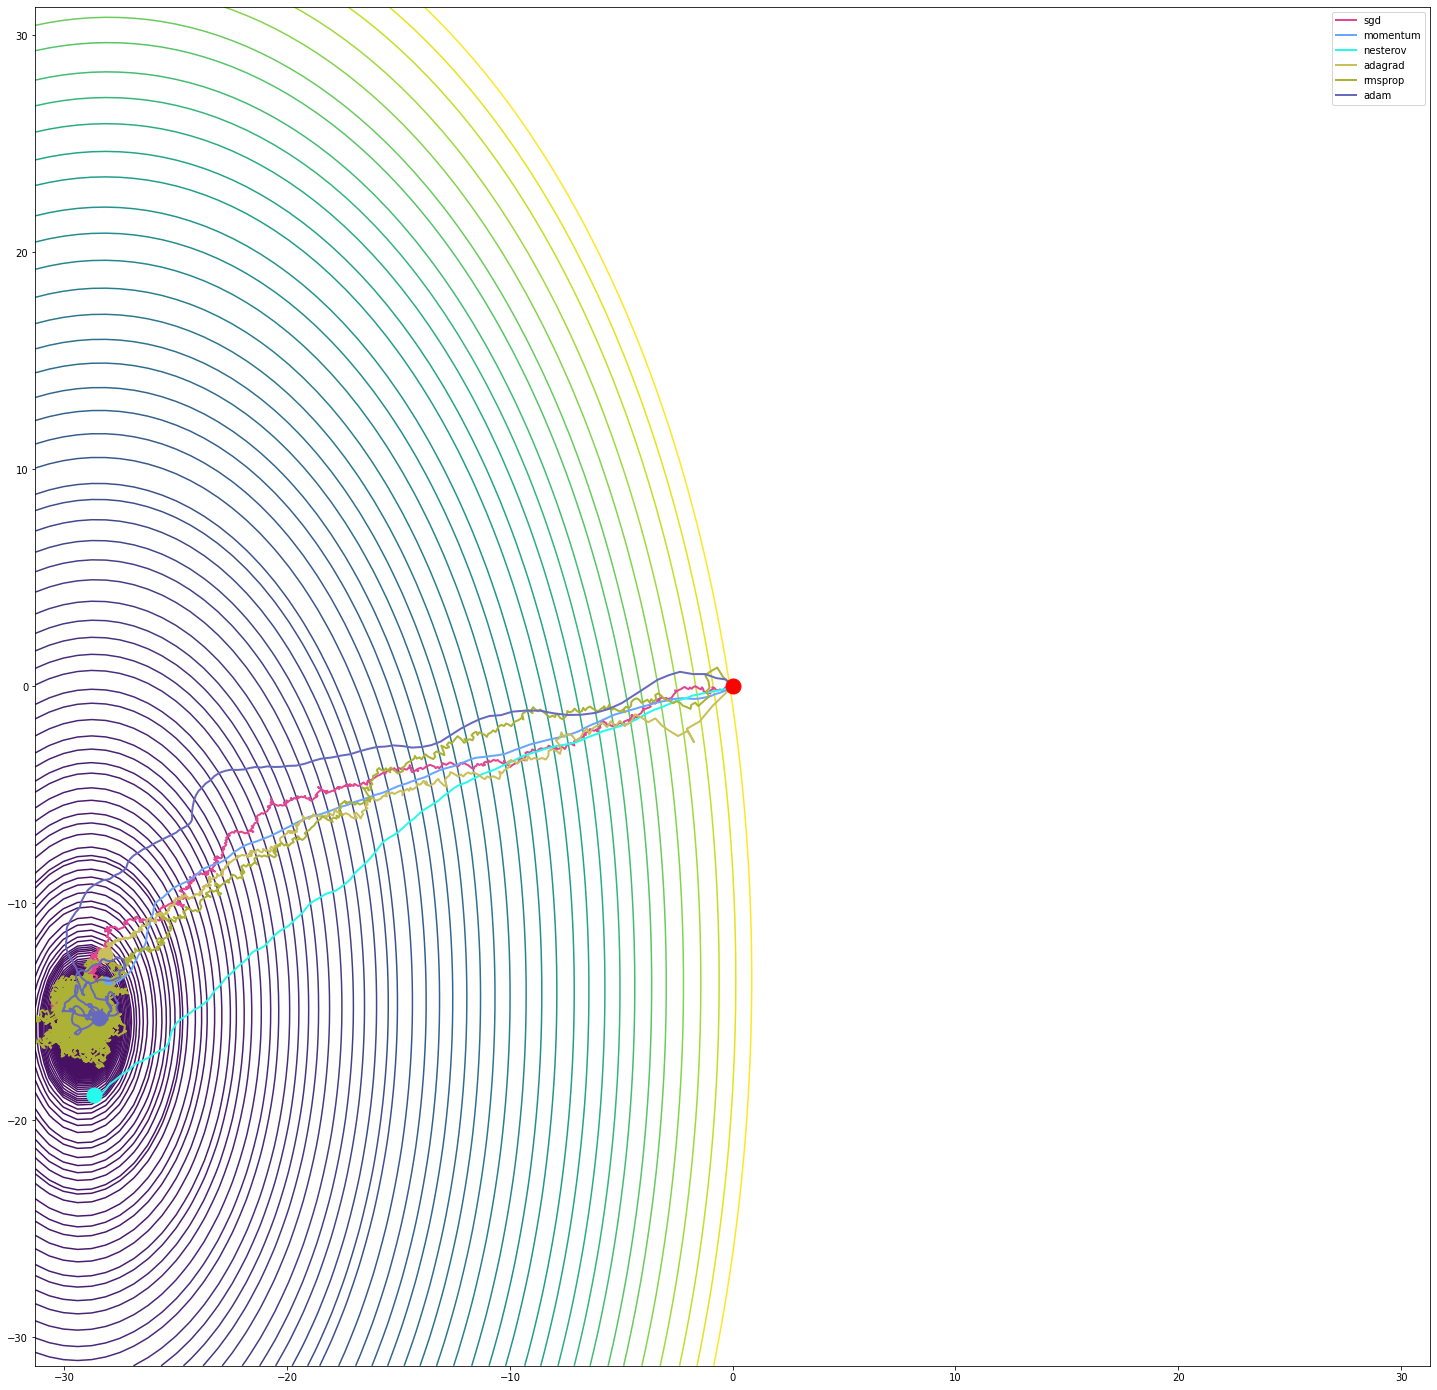

In [4]:
draw_multiple_levels(
    start_point.copy(),
    generated_points=points,
    grad_points_list=
    [
        meta_sgd["points"],
        meta_momentum["points"],
        meta_nesterov["points"],
        meta_adagrad["points"],
        meta_rmsprop["points"],
        meta_adam["points"],
    ],
    label_list=
    [
        "sgd",
        "momentum",
        "nesterov",
        "adagrad",
        "rmsprop",
        "adam",
    ],
    stride=50
)

In [5]:
start_point = np.array([0.0, 0.0])
batch_size=5

_, meta_minigd5 = minibatch_gd(points, batch_size=batch_size, start_point=start_point.copy())
_, meta_momentum = minibatch_gd(points, batch_size=batch_size, optimization=MomentumOptimization(0.95), start_point=start_point.copy())
# noinspection SpellCheckingInspection
_, meta_nesterov = minibatch_gd(points, batch_size=batch_size, optimization=NesterovOptimization(0.95), start_point=start_point.copy())
_, meta_adagrad = minibatch_gd(points, batch_size=batch_size, optimization=AdaGradOptimization(), lr=0.9, start_point=start_point.copy())
_, meta_rmsprop = minibatch_gd(points, batch_size=batch_size, optimization=RMSPropOptimization(0.95), start_point=start_point.copy())
_, meta_adam = minibatch_gd(points, batch_size=batch_size, optimization=AdamOptimization(), start_point=start_point.copy())

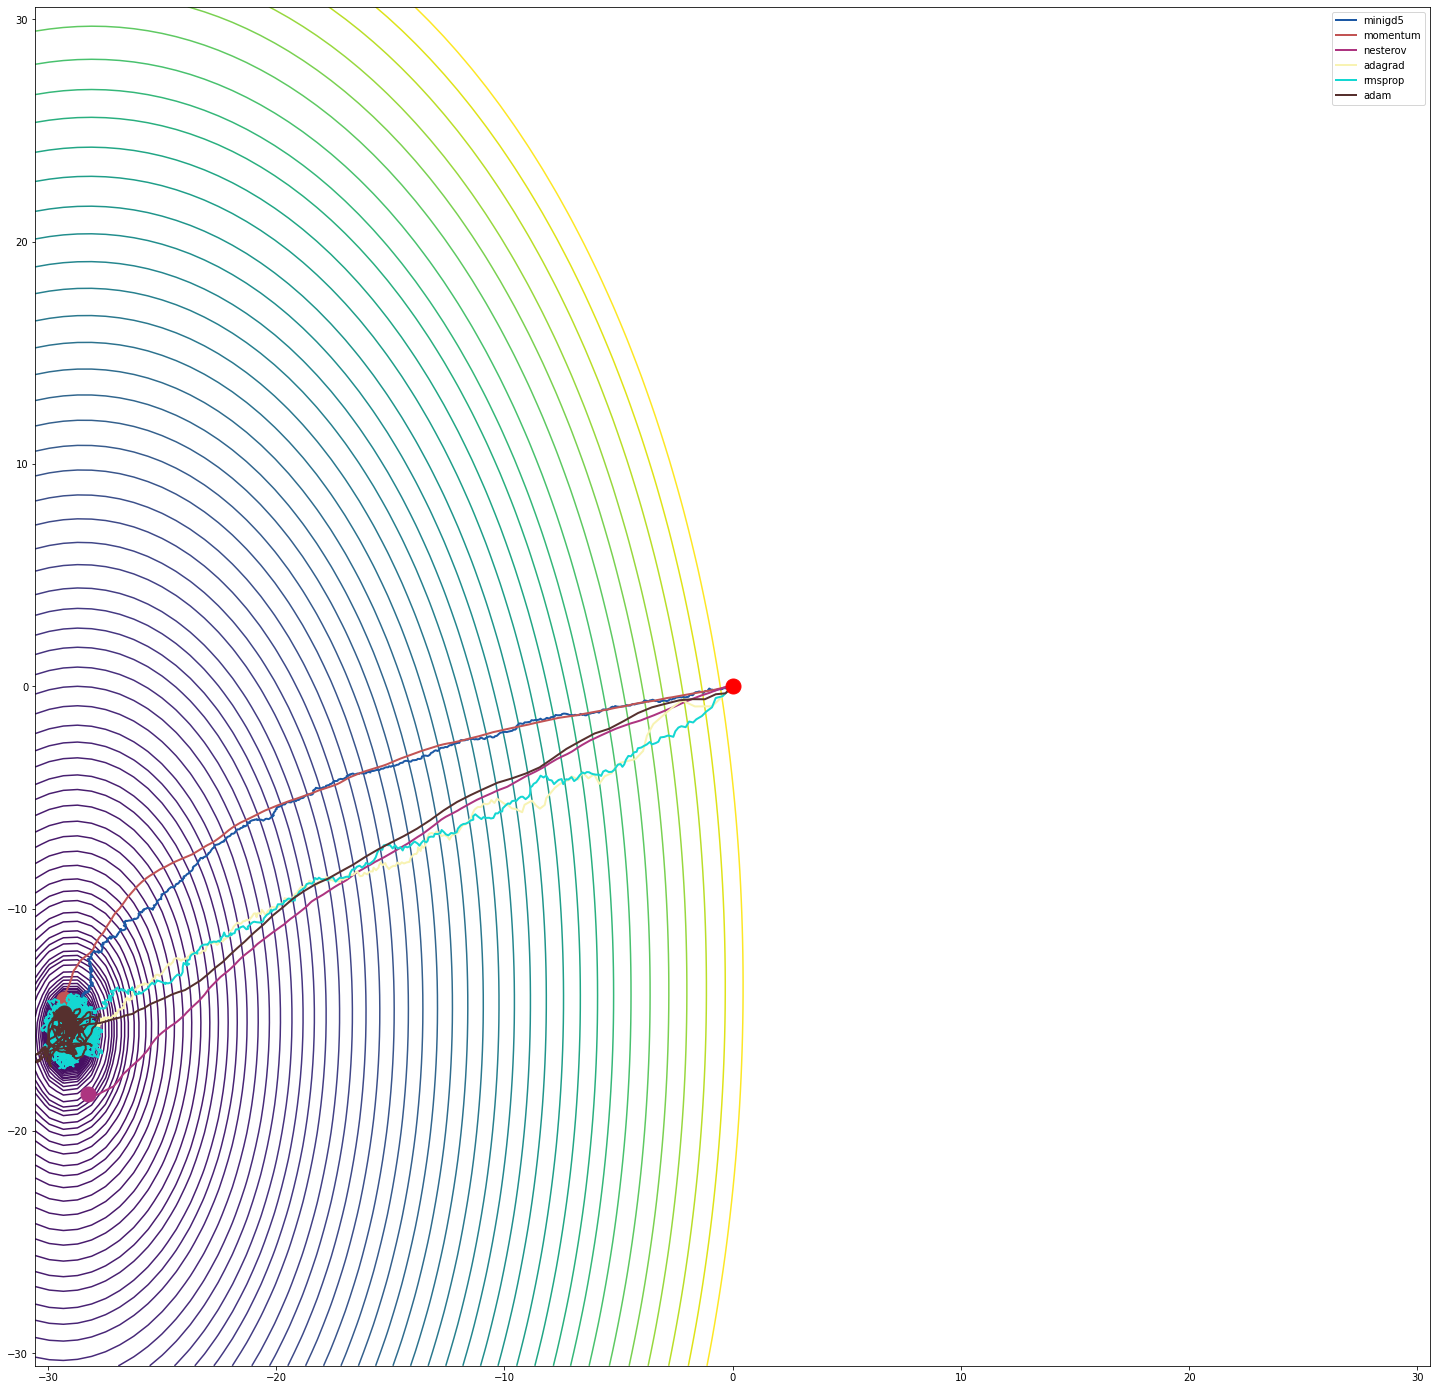

In [6]:
draw_multiple_levels(
    start_point.copy(),
    generated_points=points,
    grad_points_list=
    [
        meta_minigd5["points"],
        meta_momentum["points"],
        meta_nesterov["points"],
        meta_adagrad["points"],
        meta_rmsprop["points"],
        meta_adam["points"],
    ],
    label_list=
    [
        "minigd5",
        "momentum",
        "nesterov",
        "adagrad",
        "rmsprop",
        "adam",
    ],
    stride=50
)

In [7]:
start_point = np.array([0.0, 0.0])
batch_size=100

_, meta_minigd100 = minibatch_gd(points, batch_size=batch_size, start_point=start_point.copy())
_, meta_momentum = minibatch_gd(points, batch_size=batch_size, optimization=MomentumOptimization(0.95), start_point=start_point.copy())
# noinspection SpellCheckingInspection
_, meta_nesterov = minibatch_gd(points, batch_size=batch_size, optimization=NesterovOptimization(0.95), start_point=start_point.copy())
_, meta_adagrad = minibatch_gd(points, batch_size=batch_size, optimization=AdaGradOptimization(), lr=0.9, start_point=start_point.copy())
_, meta_rmsprop = minibatch_gd(points, batch_size=batch_size, optimization=RMSPropOptimization(0.95), start_point=start_point.copy())
_, meta_adam = minibatch_gd(points, batch_size=batch_size, optimization=AdamOptimization(), start_point=start_point.copy())

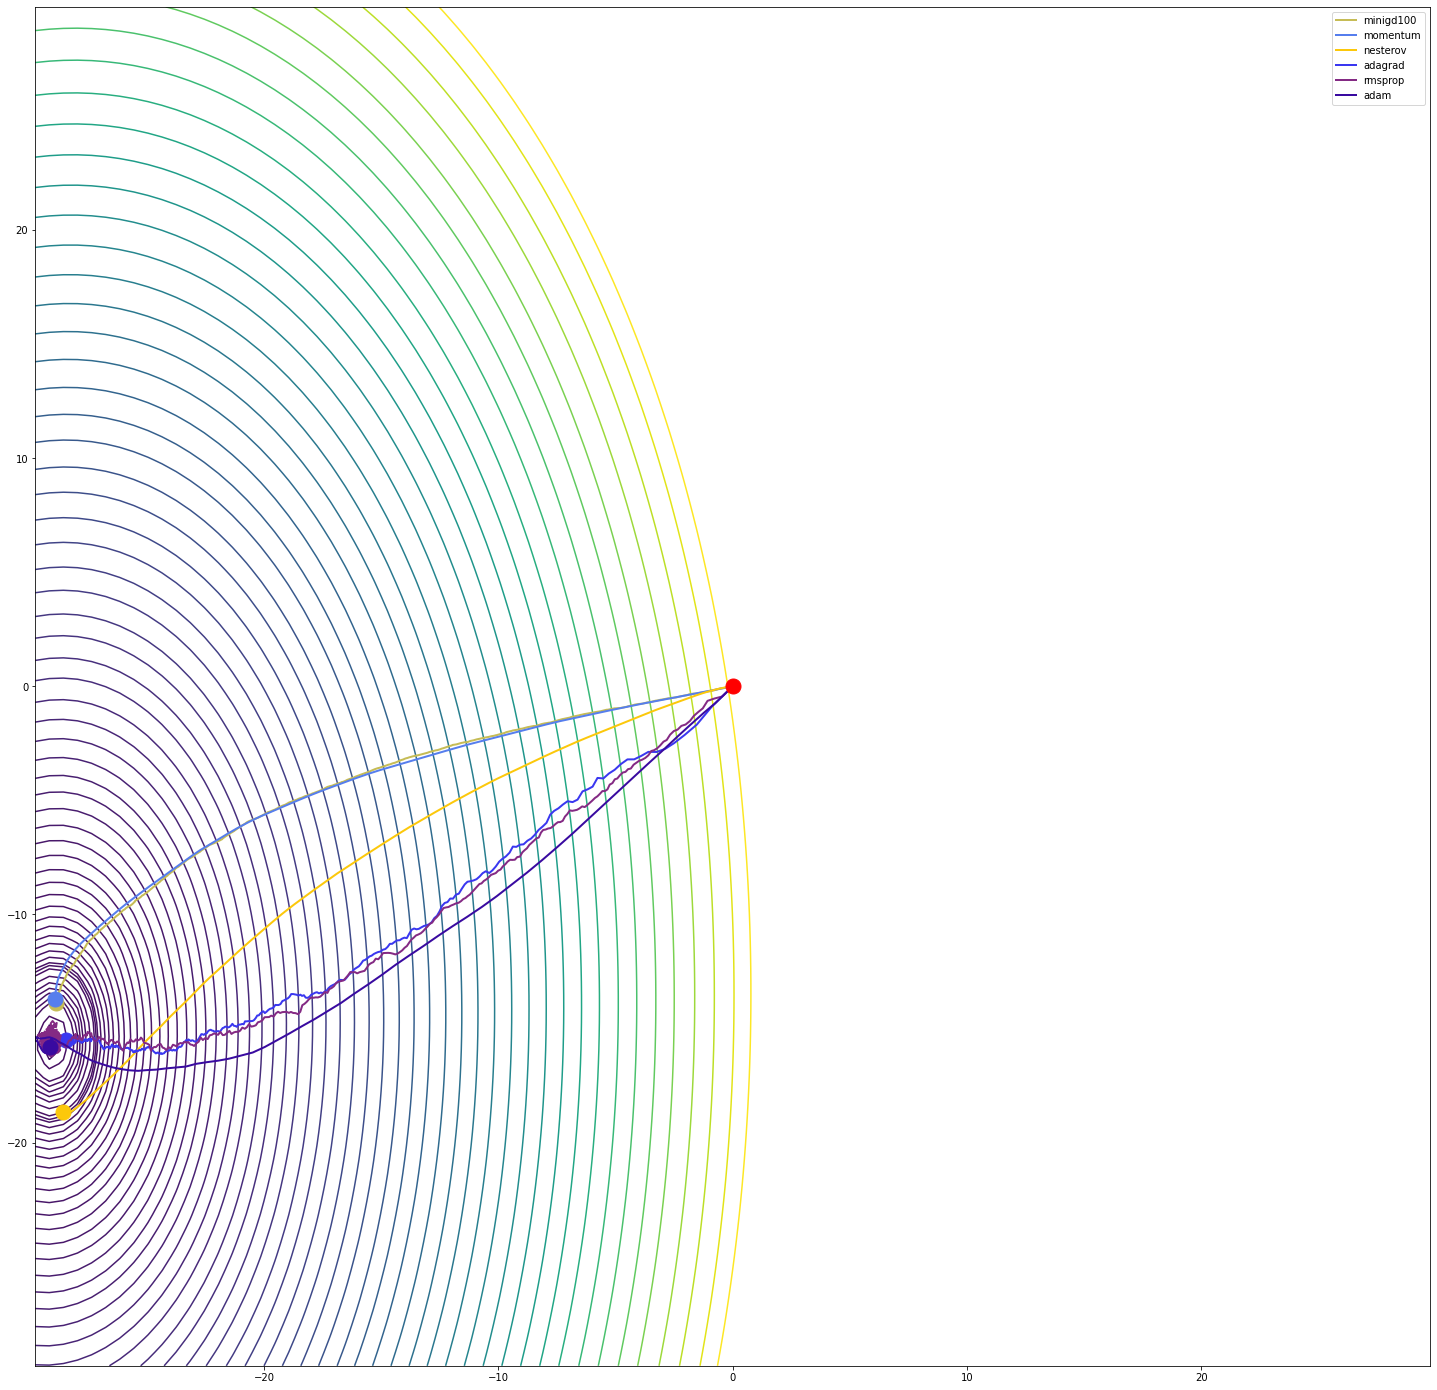

In [8]:
draw_multiple_levels(
    start_point.copy(),
    generated_points=points,
    grad_points_list=
    [
        meta_minigd100["points"],
        meta_momentum["points"],
        meta_nesterov["points"],
        meta_adagrad["points"],
        meta_rmsprop["points"],
        meta_adam["points"],
    ],
    label_list=
    [
        "minigd100",
        "momentum",
        "nesterov",
        "adagrad",
        "rmsprop",
        "adam",
    ],
    stride=50
)

#### Наблюдения

**Default**
* С увеличением батча, становится более гладким

**Momentum**
* И так гладкий, но  лучше выбирает направление

**Nesterov**
* Same as `Momentum`

**AdaGrad**
* Направление выбирает хорошо
* Но шаги маленькие

**RMSProp**
* Очень сильно "шатает", дажепри большом батче
* Но сходится хорошо

**Adam*
* Очень быстро спускается и начинает гулять вокруг минимума
* Чем больше батч, тем лучше сходимость